# Simulador de colas en cine

### Complementos necesarios

In [164]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


### Librerias

In [218]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from math import factorial

# ESTABLECIMIENTO DE PARAMETROS

## Cantidad de clientes=>

In [219]:
num_personas = 60

## Cantidad de Servidores =>

In [220]:
num_servidores = 2

## Maximo y minimo tiempo de decision de compra por cliente=>

In [221]:
min_nivel_paciencia=1
max_nivel_paciencia=2

## Rango de edad=>

In [222]:
min=14
max=60

## Tiempo maximo de cobro por parte del empleado=>

In [223]:
tiempo_general_empleado=3

## Tiempo estimado de llegada por cliente=>

In [224]:
tiempo_llegada=4

## Validacion tiempo de llegada (Obligatorio)

In [225]:
def print_g(text):
    display(HTML(f'<h1><span style="color:green">{text}</span></h1>'))

def print_r(text):
    display(HTML(f'<h1><span style="color:red">{text}</span></h1>'))

def validar_tiempo_llegada(tiempo_llegada):
    resultado = "NO ES VALIDO" if ((1 / tiempo_llegada) / (1 / (2 + tiempo_general_empleado + max_nivel_paciencia))) >= 2 else "VALOR VALIDO"
    
    if "VALOR VALIDO" in resultado:
        print_g(resultado)
    else:
        print_r(resultado)
validar_tiempo_llegada(tiempo_llegada)

#### Creacion de clientes

In [226]:

class Persona:
    ultimo_id = 0
        
    def __init__(self):
        Persona.ultimo_id += 1
        self.id = Persona.ultimo_id
        self.edad = random.randint(min, max)
        self.genero = random.choice(["Femenino", "Masculino"])
        self.nivel_paciencia = random.randint(min_nivel_paciencia, max_nivel_paciencia)
        
    def tiempo_decidir(self):
        return self.edad * 0.02 + self.nivel_paciencia

#### Generacion de n clientes

In [227]:

personas = [Persona() for _ in range(num_personas)]

# Crear DataFrame
df_personas = pd.DataFrame(
    data={
        "Identificacion": [persona.id for persona in personas],
        "Edad": [persona.edad for persona in personas],
        "Genero": [persona.genero for persona in personas],
        "Nivel_Paciencia": [persona.nivel_paciencia for persona in personas],
        "Tiempo_Decidir (min)": [persona.tiempo_decidir() for persona in personas]
    }
)

In [228]:
df_personas

,Identificacion,Edad,Genero,Nivel_Paciencia,Tiempo_Decidir (min)
0,1,17,Masculino,2,2.34
1,2,53,Masculino,2,3.06
2,3,47,Femenino,1,1.94
3,4,18,Masculino,2,2.36
4,5,50,Masculino,2,3.00
5,6,31,Masculino,2,2.62
6,7,57,Masculino,1,2.14
7,8,32,Masculino,2,2.64
8,9,25,Femenino,2,2.50
9,10,41,Femenino,1,1.82


#### Creación de empleados

In [229]:
import random

class Empleado:
    ultimo_id = 0
        
    def __init__(self):
        Empleado.ultimo_id += 1
        self.id = Empleado.ultimo_id
        self.experiencia = random.randint(50, 100) / 100  # Genera un número entre 50 y 100 y lo convierte en decimal
        #donde 100:0 experiencia, 99:1 de experiencia, y seguido hasta 50:50 de experiencia.
        self.tiempo_general = tiempo_general_empleado
        
    def tiempo_promedio(self):
        return self.tiempo_general * self.experiencia


# Servidores

#### Generación de empleados en base a los servidores

In [230]:
empleados = [Empleado() for _ in range(num_servidores)]

In [231]:
df_empleados = pd.DataFrame(
    data={
        "Identificacion": [empleado.id for empleado in empleados],
        "Experiencia": [empleado.experiencia for empleado in empleados],
        "Tiempo general de Empleado (min)": [empleado.tiempo_general for empleado in empleados],
        "Tiempo promedio de Empleado (min)": [empleado.tiempo_promedio() for empleado in empleados]
    }
)

In [232]:
df_empleados

,Identificacion,Experiencia,Tiempo general de Empleado (min),Tiempo promedio de Empleado (min)
0,1,0.84,3,2.52
1,2,0.55,3,1.65


In [233]:
def persona_llega(env, persona, df_empleados, df_resultados):
    tiempo_decision = persona["Tiempo_Decidir (min)"]

    # Seleccionar un empleado al azar
    empleado = df_empleados.sample().iloc[0]

    tiempo_empleado = empleado["Tiempo promedio de Empleado (min)"]

    yield env.timeout(tiempo_decision + tiempo_empleado)

    df_resultados.loc[len(df_resultados)] = [persona["Identificacion"],persona["Genero"], empleado["Identificacion"],persona["Edad"], tiempo_decision + tiempo_empleado]

In [234]:
def simular_cola(df_personas, df_empleados):
    env = simpy.Environment()
    df_resultados = pd.DataFrame(columns=["Id_Persona","Genero", "Id_Empleado","Edad", "Tiempo_Total_Servicio(Ts)"])

    for _, persona in df_personas.iterrows():
        env.process(persona_llega(env, persona, df_empleados, df_resultados))

    env.run(until=100)  # Ajusta este valor según sea necesario

    return df_resultados

In [235]:
df_resultados_simulacion = simular_cola(df_personas, df_empleados)

In [236]:
df_resultados_simulacion=df_resultados_simulacion.sort_values(by="Id_Persona")
df_resultados_simulacion

,Id_Persona,Genero,Id_Empleado,Edad,Tiempo_Total_Servicio(Ts)
46,1,Masculino,1.0,17,4.86
59,2,Masculino,1.0,53,5.58
5,3,Femenino,2.0,47,3.59
16,4,Masculino,2.0,18,4.01
43,5,Masculino,2.0,50,4.65
49,6,Masculino,1.0,31,5.14
8,7,Masculino,2.0,57,3.79
51,8,Masculino,1.0,32,5.16
19,9,Femenino,2.0,25,4.15
32,10,Femenino,1.0,41,4.34


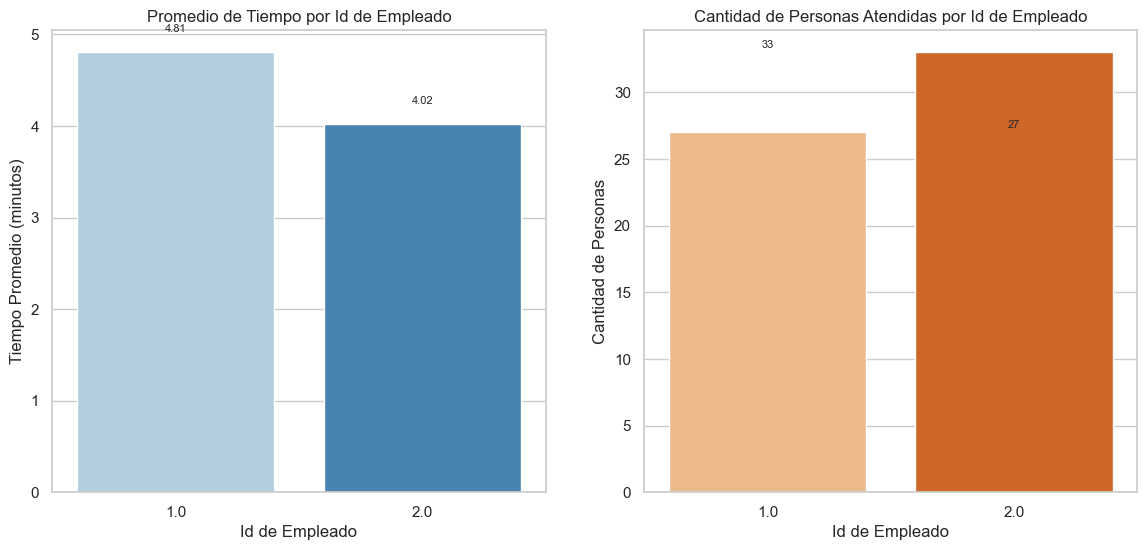

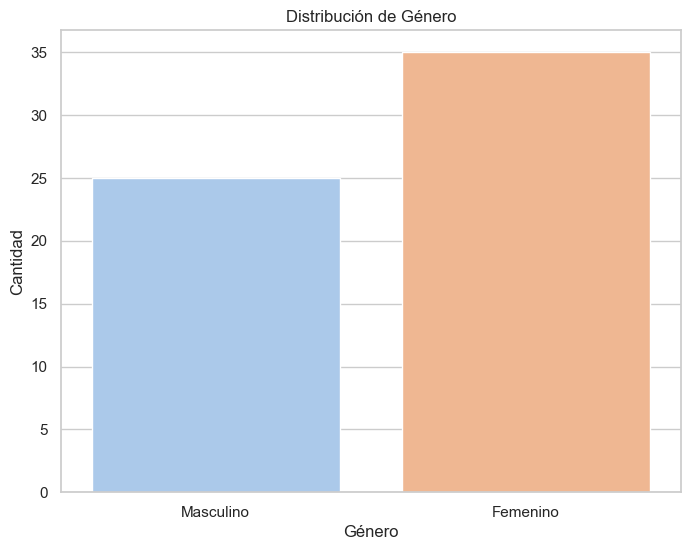

<Figure size 640x480 with 0 Axes>

In [237]:
# Calcular el promedio de tiempo por Id de Empleado
promedio_tiempo = df_resultados_simulacion.groupby('Id_Empleado')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

# Contar la cantidad de personas atendidas por empleado
cantidad_personas = df_resultados_simulacion['Id_Empleado'].value_counts().reset_index()
cantidad_personas.columns = ['Id_Empleado', 'Cantidad_Personas']

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfica del promedio de tiempo por Id de Empleado
sns.barplot(x='Id_Empleado', y='Tiempo_Total_Servicio(Ts)', data=promedio_tiempo, palette='Blues', ax=axes[0])
axes[0].set_title('Promedio de Tiempo por Id de Empleado')
axes[0].set_xlabel('Id de Empleado')
axes[0].set_ylabel('Tiempo Promedio (minutos)')

# Añadir valores en las barras
for index, value in enumerate(promedio_tiempo['Tiempo_Total_Servicio(Ts)']):
    axes[0].text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Gráfica de la cantidad de personas atendidas por empleado
sns.barplot(x='Id_Empleado', y='Cantidad_Personas', data=cantidad_personas, palette='Oranges', ax=axes[1])
axes[1].set_title('Cantidad de Personas Atendidas por Id de Empleado')
axes[1].set_xlabel('Id de Empleado')
axes[1].set_ylabel('Cantidad de Personas')
plt.savefig('graficos_empleados_personas.png')
# Añadir valores en las barras
for index, value in enumerate(cantidad_personas['Cantidad_Personas']):
    axes[1].text(index, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=8)

# Gráfico de barras para la distribución de género
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Genero', data=df_resultados_simulacion, palette='pastel')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.savefig('grafico_genero.png')
plt.show()
   
plt.tight_layout()

plt.show()

In [238]:
df_resultados_simulacion.to_excel('muestra_datos_resultados.xlsx', index=False)

In [239]:
#-----------------------------------------------------------------------------------------------------------------------
# Calcular el promedio de tiempo por persona
promedio_ServicioCliente = df_resultados_simulacion.groupby('Id_Persona')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

#Punto 7
promedio_Total_TS= df_resultados_simulacion['Tiempo_Total_Servicio(Ts)'].mean()
#--------------------------------------------------------------------------------------------------------------------------

#print(promedio_ServicioCliente)
print("El promedio del servicio fue de: ", promedio_Total_TS, " min")


El promedio del servicio fue de:  4.373500000000001  min


# Calculos

In [240]:
# Funciones para el modelo M/M/1
def mm1_avg_customers(lam, mu):
    rho = lam / mu
    ls = rho / (1 - rho)
    return ls

def mm1_total_time(lam, mu):
    ws = 1 / (mu - lam)
    return ws

def mm1_system_utilization(lam, mu):
    rho = lam / mu
    return rho

def mm1_avg_waiting_customers(lam, mu):
    lq = lam ** 2 / (mu * (mu - lam))
    return lq

def mm1_empty_system_probability(lam, mu):
    p0 = 1 - lam / mu
    return p0

def mm1_probability_n_customers(lam, mu, n):
    rho = lam / mu
    pn = (1 - rho) * (rho ** n)
    return pn

In [241]:
# Funciones para el modelo M/M/S
def mms_avg_customers(lam, mu, s):
    rho = lam / (s * mu)
    numerador = rho ** s * (1 - rho)
    denominador = factorial(s) * (1 - rho)
    ls = numerador / denominador
    return ls

def mms_avg_time(lam, mu, s):
    ls = mms_avg_customers(lam, mu, s)
    ws = ls / lam
    return ws

def mms_avg_waiting_customers(lam, mu, s):
    lq = mms_avg_customers(lam, mu, s) - lam / mu
    return lq

def mms_empty_system_probability(lam, mu, s):
    rho = lam / (s * mu)
    p0_denom = sum([(rho ** n) / factorial(n) for n in range(s)])
    p0 = 1 / (1 + ((rho ** s) / factorial(s)) * p0_denom)
    return p0

def mms_probability_n_customers(lam, mu, s, n):
    rho = lam / (s * mu)
    if n < s:
        pn = (rho ** n) / factorial(n)
    else:
        pn = (rho ** n) / (factorial(s) * (s ** (n - s)))
    return pn

## Ejecucion de formulas


In [242]:
lam=1/tiempo_llegada
mu=1/promedio_Total_TS
s=num_servidores

if num_servidores == 1:
       

        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mm1_avg_customers(lam, mu),
            "Tiempo total en el sistema": mm1_total_time(lam, mu),
            "Utilización del sistema": mm1_system_utilization(lam, mu),
            "Número promedio de clientes en la fila": mm1_avg_waiting_customers(lam, mu),
            "Probabilidad de sistema vacío": mm1_empty_system_probability(lam, mu)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/1"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

elif num_servidores >= 2:
        
        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mms_avg_customers(lam, mu, s),
            "Tiempo promedio en el sistema": mms_avg_time(lam, mu, s),
            "Número promedio de clientes en la fila": mms_avg_waiting_customers(lam, mu, s),
            "Probabilidad de sistema vacío": mms_empty_system_probability(lam, mu, s)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/S"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

,Número promedio de clientes en el sistema,Tiempo promedio en el sistema,Número promedio de clientes en la fila,Probabilidad de sistema vacío
M/M/S,0.149434,0.597734,-0.943941,0.812264


In [243]:
# Valores utilizados en la prueba
valores = {
    "Tasa de llegada(λ)":lam,
    "Tasa de servicio(µ)":mu,
    "Numero de servidores(s)":num_servidores
}

#Crear el Dataframe

df_valores_tasa_utilizados=pd.DataFrame(valores,index=["valores"])


In [244]:
df_valores_tasa_utilizados
df_valores_tasa_utilizados.to_excel('Valores_tasa_utilizados.xlsx', index=True)

In [245]:
informe="Informe_final.xlsx"

with pd.ExcelWriter(informe, engine='xlsxwriter') as writer:
    # Escribe cada DataFrame en una hoja diferente
    df_personas.to_excel(writer, sheet_name='Personas_muestra', index=False)
    df_empleados.to_excel(writer, sheet_name='Empleados', index=False)
    df_valores_tasa_utilizados.to_excel(writer, sheet_name='Valores de tasa', index=False)
    df_resultados_simulacion.to_excel(writer, sheet_name='Resultados_simulacion', index=False)
    results_df.to_excel(writer, sheet_name='Resultados_modelo', index=False)